In [2]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

def ecfp_counts(mols):
    fps = [AllChem.GetMorganFingerprint(mol, radius=3, useCounts=True, useFeatures=True) for mol in mols]
    nfp = np.zeros((len(fps), 1024), np.uint8)
    for i, fp in enumerate(fps):
        for idx, v in fp.GetNonzeroElements().items():
            nidx = idx % 1024
            nfp[i, nidx] += int(v)
    return nfp

df = pd.read_csv("data/reference_library.csv", header=None)

smiles = df[0]

from tqdm import tqdm

R = []
for chunk in tqdm(chunker(smiles, 10000)):
    mols = [Chem.MolFromSmiles(smi) for smi in chunk]
    e = ecfp_counts(mols)
    R += [e]
ecfp = np.concatenate(R)

69it [03:36,  3.14s/it][16:09:45] WARNING: not removing hydrogen atom without neighbors
77it [04:01,  3.16s/it][16:10:11] WARNING: not removing hydrogen atom without neighbors
83it [04:20,  3.15s/it][16:10:30] WARNING: not removing hydrogen atom without neighbors
200it [10:30,  3.15s/it]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (200,) + inhomogeneous part.

In [14]:
np.savetxt("data/reference_ecfp.csv", ecfp, delimiter=",")

In [16]:
data = pd.read_csv("data/reference_ecfp.csv").values()

: 

: 

In [4]:
# Smaller Dataset

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

def ecfp_counts(mols):
    fps = [AllChem.GetMorganFingerprint(mol, radius=3, useCounts=True, useFeatures=True) for mol in mols]
    nfp = np.zeros((len(fps), 1024), np.uint8)
    for i, fp in enumerate(fps):
        for idx, v in fp.GetNonzeroElements().items():
            nidx = idx % 1024
            nfp[i, nidx] += int(v)
    return nfp


df = pd.read_csv("data/reference_library.csv", header=None)

smiles = df[0].loc[0:49999]

from tqdm import tqdm

R = []
for chunk in tqdm(chunker(smiles, 10000)):
    mols = [Chem.MolFromSmiles(smi) for smi in chunk]
    e = ecfp_counts(mols)
    R += [e]
ecfp = np.concatenate(R)

5it [00:15,  3.14s/it]


5it [00:12,  2.51s/it]


<AxesSubplot:>

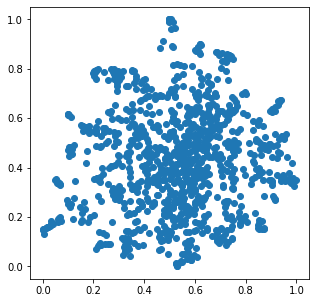

In [5]:
from griddify import FeatureDistances, Tabular2Cloud
from griddify.plots import cloud_plot

fd = FeatureDistances(metric="cosine").calculate(ecfp)
tc = Tabular2Cloud()
tc.fit(fd)
Xc = tc.transform(fd)

cloud_plot(Xc)

<AxesSubplot:>

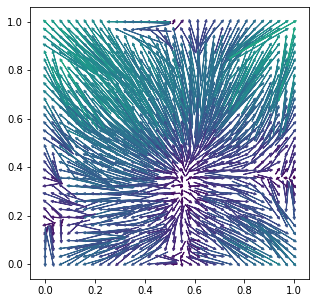

In [6]:
from griddify import Cloud2Grid
from griddify.plots import arrows_plot

cg = Cloud2Grid()
cg.fit(Xc)
Xg = cg.transform(Xc)
mappings, side = cg.get_mappings(Xc)

arrows_plot(Xc, Xg)

100%|██████████| 50000/50000 [00:59<00:00, 844.52it/s]


<AxesSubplot:>

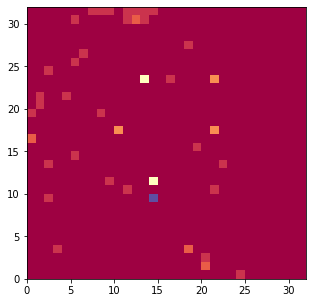

In [8]:
from griddify import Flat2Grid
from griddify.plots import grid_plot

fg = Flat2Grid(mappings, side)
Xi = fg.transform(ecfp)
grid_plot(Xi[0])

In [9]:
import joblib
joblib.dump(fg, "models/grid_transformer.joblib")

['models/grid_transformer.joblib']